In [7]:
import numpy as np
from dask.distributed import Client
import dask.array as da

In [8]:
client = Client()  # set up local cluster on your lapotp
client

bokeh.server.server - CRITICAL - Cannot start Bokeh server, port 8787 is already in use
tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7fbface49158>, <tornado.concurrent.Future object at 0x7fbface48438>)
Traceback (most recent call last):
  File "/home/wd15/anaconda/lib/python3.5/site-packages/bokeh/server/tornado.py", line 437, in _start_async
    signal.signal(signal.SIGTERM, self._sigterm)
  File "/home/wd15/anaconda/lib/python3.5/signal.py", line 47, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 604, in _run_callback
    ret = callback()
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    re

<Client: scheduler='tcp://127.0.0.1:37713' processes=12 cores=12>

In [13]:
import dask.array as da

In [ ]:
da.

In [10]:
a = da.random.random((100, 100), chunks=(10,100))
type(a.compute())

numpy.ndarray

In [11]:
?a.compute


In [1]:
from fmks.data.cahn_hilliard import solve_cahn_hilliard
import numpy as np

x_data = np.random.random((1, 100, 100))

for i in range(4000):
    x_data = solve_cahn_hilliard(x_data,
                                 delta_t=1e-2)


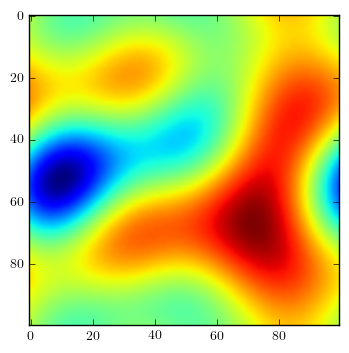

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(x_data[0])

In [6]:
import fmks
from fmks.data.cahn_hilliard import generate_cahn_hilliard_data
import numpy as np
n = 41
n_samples = 400
dt = 1e-2
np.random.seed(99)
X, y = generate_cahn_hilliard_data((400, 41, 41), delta_t=dt)


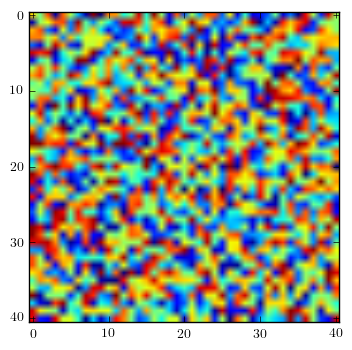

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X[0])

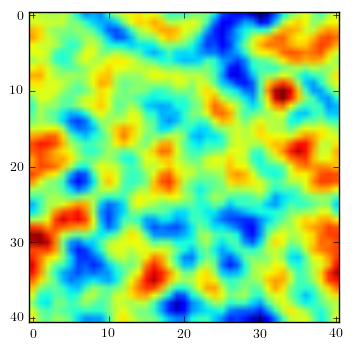

In [9]:
plt.imshow(y[0])

In [5]:
def square(x):
    for i in range(100000000):
        y = x ** 2
    return 5

def neg(x):
    return -x

A = client.map(square, range(10))
B = client.map(neg, A)
total = client.submit(sum, B)
total.result()

-50

In [1]:

?da.linspace

Object `da.linspace` not found.


In [25]:
samples = 100
N = 100
size = samples * N * N
samples = 50

In [29]:
a = da.random.random((samples, N, N), chunks=(10, N, N))
b = np.random.random((1, 100, 100))
result = a * b


In [34]:
aa = da.random.random((50, 100, 100), chunks=(10, 100, 100))
bb = da.random.random((1, 100, 100), chunks=(1, 100, 100))

In [42]:
bb.chunks

((1,), (100,), (100,))

In [46]:
bb = da.indices((100, 100), chunks=(100, 100))

In [47]:
bb.compute()

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ..., 
        [97, 97, 97, ..., 97, 97, 97],
        [98, 98, 98, ..., 98, 98, 98],
        [99, 99, 99, ..., 99, 99, 99]],

       [[ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        ..., 
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99]]])

In [31]:
result.dask

In [71]:
%%timeit
a = da.linspace(0, 1, size, chunks=(size // 12,))
b = a * a + a * a + a**3
out = b.sum()
result = out.compute()
print(result)

distributed.batched - INFO - Batched Comm Closed: Stream is closed
distributed.utils - ERROR - ("('linspace-ec769da254d25761c811645ec5da52b7', 12)", 'tcp://127.0.0.1:33689')
Traceback (most recent call last):
  File "/home/wd15/anaconda/lib/python3.5/site-packages/distributed/utils.py", line 212, in f
    result[0] = yield make_coro()
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 3, in raise_exc_info
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/gen.py", line 1021, in run
    yielded = self.gen.throw(*exc_info)
  File "/home/wd15/anaconda/lib/python3.5/site-packages/distributed/client.py", line 1551, in _get
    result = yield self._gather(packed)
  File "/home/wd15/anaconda/lib/python3.5/site-packages/tornado/gen.py", line 1015, in run
   

KeyboardInterrupt: 

In [69]:
%%timeit

a = np.linspace(0, 1, size)
b = a * a + a * a + a**3
out = b.sum()
print(out)


91666667.25
91666667.25
91666667.25
91666667.25
1 loop, best of 3: 6.65 s per loop


In [63]:
print(result)

NameError: name 'result' is not defined

In [8]:
import dask
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da

In [9]:
def func(x):
    return 3 * x  - 1

def make_data(x):
    return 0.5 * (2 * np.random.random(x.shape) - 1) + func(x)

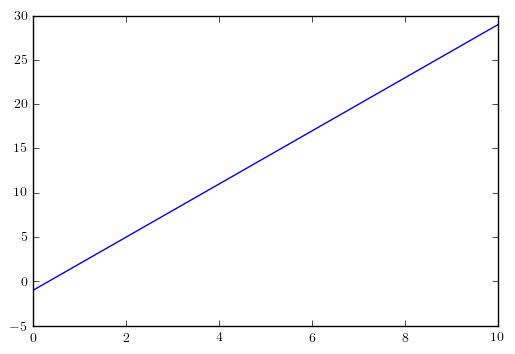

In [11]:
x = da.linspace(0, 10, 1000, chunks=10)
y = func(x)
plt.plot(x,y)
plt.show()

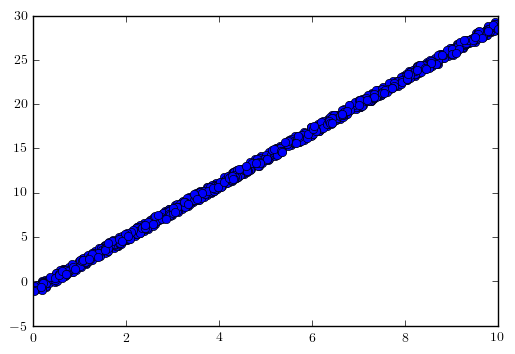

In [14]:
x_ = da.random.random(1000, chunks=10) * 10
y_ = make_data(x_)
plt.plot(x_, y_, 'o')
plt.show()

In [16]:
x__ = da.concatenate((x_[:,None], da.ones(1000, chunks=10)[:,None]), axis=-1)
print(x__)

dask.array<concatenate, shape=(1000, 2), dtype=float64, chunksize=(10, 1)>


In [20]:
print(x__.shape)
y__ = y_[:, None]
print(x__)
print(y__)

da.linalg.lstsq(x__, y__)[0]


(1000, 2)
dask.array<concatenate, shape=(1000, 2), dtype=float64, chunksize=(10, 1)>
dask.array<getitem, shape=(1000, 1), dtype=float64, chunksize=(10, 1)>


ValueError: Input must have the following properties:
  1. Have two dimensions
  2. Have only one column of blocks

In [7]:
import dask.array as da
x = np.arange(1000)
y = da.from_array(x, chunks=(100))
y.mean().compute()

499.5